# Homework 8
## Problem 2.1
Determine minimum $\frac{L'}{V'}$ using the same data as problem 1.

The minimum value of $\frac{L'}{V'} can be found with the equation
$$
L'_{min} = \frac{V'(Y_{N+1}-Y_1)}{\frac{Y_{N+1}}{Y_{N+1}(K_N-1)+K_N}-X_0} \tag{1}
$$


where $Y_{N+1}$, $X_0$, $Y_1$, and $V'$ are used in problem 1 and $K_N = \frac{y_{N+1}}{x_N}$.

In [51]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

In [52]:
Vp = .9
YNp1 = .1/.9
Y1 = .216*YNp1   
XN = .08763
yNp1 = YNp1/(1+YNp1)
xN = XN/(1+XN)
KN = yNp1/xN
X0 = .04
LpMin = Vp*(YNp1-Y1)/(YNp1/(YNp1*(KN-1)+KN)-X0)

flow = LpMin/Vp
# print(flow)

$\frac{L'}{V'} = 1.83$

## Problem 2.2
Determine the number of stages if twice the minimum flow rate is used.

The number of stages can be found graphically similarly to the process in problem 1. The equilibrium data is plotted and the operating line can be determined by $X_0$, $Y_1$, and $\frac{L'}{V'}$. The lines can then be drawn in to connect the equilibrium curve and operating line.

In [53]:
X = np.array([.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.11])                              #co2/air
Y = np.array([.003,.008,.015,.023,.032,.043,.055,.068,.083,.099,.12])                   #co2/amine


xinterp = interp.interp1d(Y,X,kind='cubic')                                             #interpolation of data
slope = 2*flow      
                                                            
def Ynp1(XN):                                                                           #returns op line
    return (XN-X0)*slope+Y1
dep = np.linspace(X0,.11)
# print(slope)

''

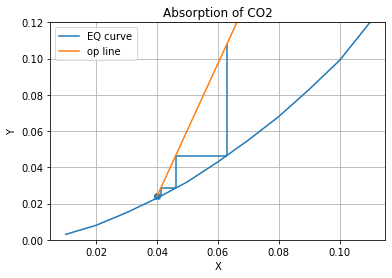

In [54]:
plt.plot(X,Y,label='EQ curve')
plt.scatter(X0,Y1)
plt.plot(dep,Ynp1(dep),label='op line')
plt.grid()
plt.ylim(0,.12)

x1 = xinterp(Y1)                                                            #lines connecting eq and op lines
y1 = Ynp1(x1)
x2 = xinterp(y1)
y2 = Ynp1(x2)
x3 = xinterp(y2)
y3 = Ynp1(x3)
# x4 = xinterp(y3)
# y4 = Ynp1(x4)
# x5 = xinterp(y4)
# y5 = Ynp1(x5)
# x6 = xinterp(y5)
# y6 = Ynp1(x6)
# x7 = xinterp(y6)                                                        # only has 6 stages. use x7,y7 to check
# y7 = Ynp1(x7)
    


plt.hlines(Y1,X0,x1)                    
plt.vlines(x1,Y1,y1)
plt.hlines(y1,x1,x2)
plt.vlines(x2,y1,y2)
plt.hlines(y2,x2,x3)
plt.vlines(x3,y2,y3)

plt.title('Absorption of CO2')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()

;

$3$ theoretical stages are required for this process.

## Problem 2.3
Determine number of actual trays needed if each stage has an efficiency of $40$%

The efficiency is found by 
$$
E = \frac{N_t}{N_a} \tag{2}
$$


which means that $N_a=\frac{3}{0.40} = 7.5$ so $8$ actual trays are required.